In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import numpy as np
from tqdm import tqdm
import math
import os

import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
K.clear_session()
import itertools
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.layers import Input, Lambda
from keras.models import Model
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
from PIL import Image
import numpy as np

from tensorflow.keras import layers, Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input  

In [ ]:
image_directory = '/content/gdrive/MyDrive/fn/'
SIZE = 224
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all fire images and 1 to nonfire.

fire_images = os.listdir(image_directory + 'fire/')
for i, image_name in enumerate(fire_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'fire/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

non_fire_images = os.listdir(image_directory + 'non_fire/')
for i, image_name in enumerate(non_fire_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'non_fire/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)


from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


from tensorflow.keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

IMAGE_SIZE = [SIZE, SIZE]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
       layer.trainable = False

folders = glob('/content/gdrive/MyDrive/fn/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x) # softmax

        # create a model object
model_vgg = Model(inputs=vgg.input, outputs=prediction)

#model_vgg.summary()

model_vgg.compile(optimizer='adam',  # Good default optimizer to start with
                    loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                      metrics=['accuracy'])  # what to track

history_vgg = model_vgg.fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test))  # train the model

val_loss, val_acc = model_vgg.evaluate(X_test, y_test)  # evaluate the out of sample data with model

print("model loss is: ",val_loss)  # model's loss (error)

print(" Model accuracy is: ", val_acc)  # model's accuracy

#37m

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/25
5/5 [==============================] - 90s 18s/step - loss: 1.2999 - accuracy: 0.4577 - val_loss: 1.3218 - val_accuracy: 0.4444
Epoch 2/25
5/5 [==============================] - 88s 18s/step - loss: 0.8251 - accuracy: 0.5211 - val_loss: 0.6844 - val_accuracy: 0.5556
Epoch 3/25
5/5 [==============================] - 88s 18s/step - loss: 0.6653 - accuracy: 0.5986 - val_loss: 0.6984 - val_accuracy: 0.5278
Epoch 4/25
5/5 [==============================] - 88s 18s/step - loss: 0.5572 - accuracy: 0.6831 - val_loss: 0.5401 - val_accuracy: 0.6944
Epoch 5/25
5/5 [==============================] - 88s 18s/step - loss: 0.4169 - accuracy: 0.8380 - val_loss: 0.6184 - val_accuracy: 0.6389
Epoch 6/25
5/5 [==============================] - 88s 18s/step - loss: 0.3746 - accuracy: 0.8521 - val_loss: 0.5160 - val_accuracy: 0.6944
Epoch 7/25
5/5 [==============================] - 88s 18s/step - loss: 0.3460 - accuracy: 0.8873 - va

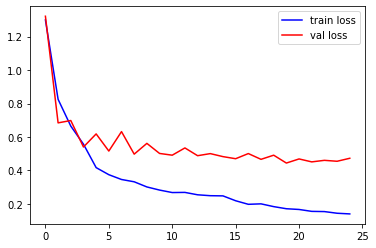

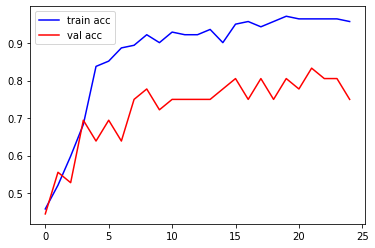

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history_vgg.history['loss'], color='blue',label='train loss')
plt.plot(history_vgg.history['val_loss'], color='red', label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(history_vgg.history['accuracy'],color='blue', label='train acc')
plt.plot(history_vgg.history['val_accuracy'],color='red', label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model_vgg.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1]
[0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73        20
           1       0.65      0.94      0.77        16

    accuracy                           0.75        36
   macro avg       0.79      0.77      0.75        36
weighted avg       0.80      0.75      0.75        36



In [ ]:
confusion_matrix(y_test, y_pred)

array([[12,  8],
       [ 1, 15]])

In [ ]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')


precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.652174
Recall: 0.937500
F1 score: 0.769231


In [ ]:
accuracy = log_loss(y_test, y_pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 8.63


AUC - Test Set: 76.88%


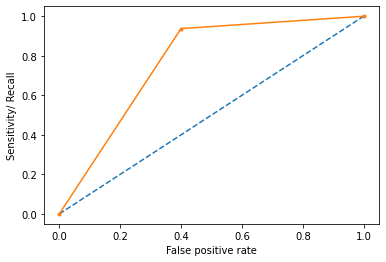

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_pred)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()